In [8]:
# Part 1: Data Preparation and Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/IS675_data/banksim.csv'  # Update the path
data = pd.read_csv(file_path)

# Convert string columns to category data type
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Encode categorical variables
le = preprocessing.LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(lambda col: le.fit_transform(col))

# Outlier detection and handling using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data[~outliers]

# Splitting dataset into features (X) and target (y)
X = data_cleaned.drop('fraud', axis=1)
y = data_cleaned['fraud']

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

<ipython-input-8-4217c0b17d1f>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [9]:
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()

# Display the first few rows of the dataframe to understand its structure
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


(None,
    step       customer  age gender zipcodeOri       merchant zipMerchant  \
 0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
 1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
 2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
 3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
 4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
 
               category  amount  fraud  
 0  'es_transportation'    4.55      0  
 1  'es_transportation'   39.68      0  
 2  'es_transportation'   26.89      0  
 3  'es_transportation'   17.25      0  
 4  'es_transportation'   35.72      0  )

In [10]:
# Check the distribution of the target variable 'fraud'
class_distribution = data['fraud'].value_counts(normalize=True)

# Display the class distribution
class_distribution

0    0.987892
1    0.012108
Name: fraud, dtype: float64

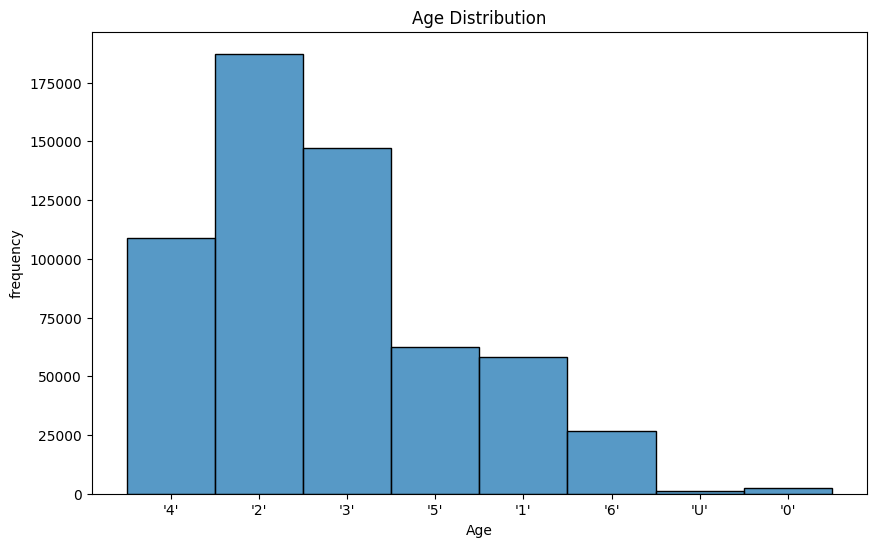

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

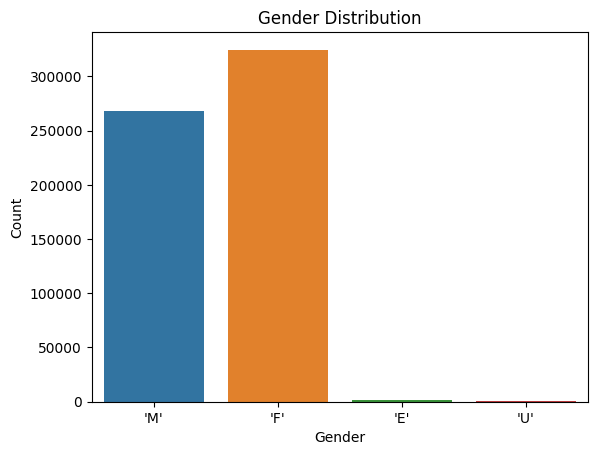

In [12]:
sns.countplot(data=data, x='gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

['NoSpam', 'Spam']


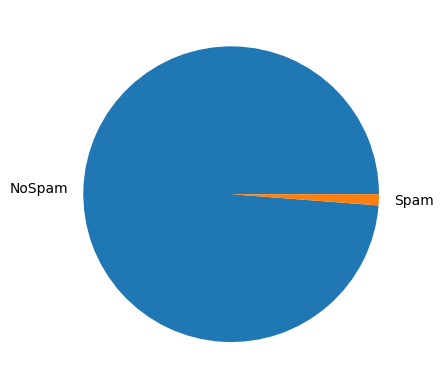

In [13]:
isFraud=data['fraud'].value_counts()
FraudOrNot=["NoSpam", "Spam"]
plt.pie(isFraud.values, labels=FraudOrNot)
print(FraudOrNot)

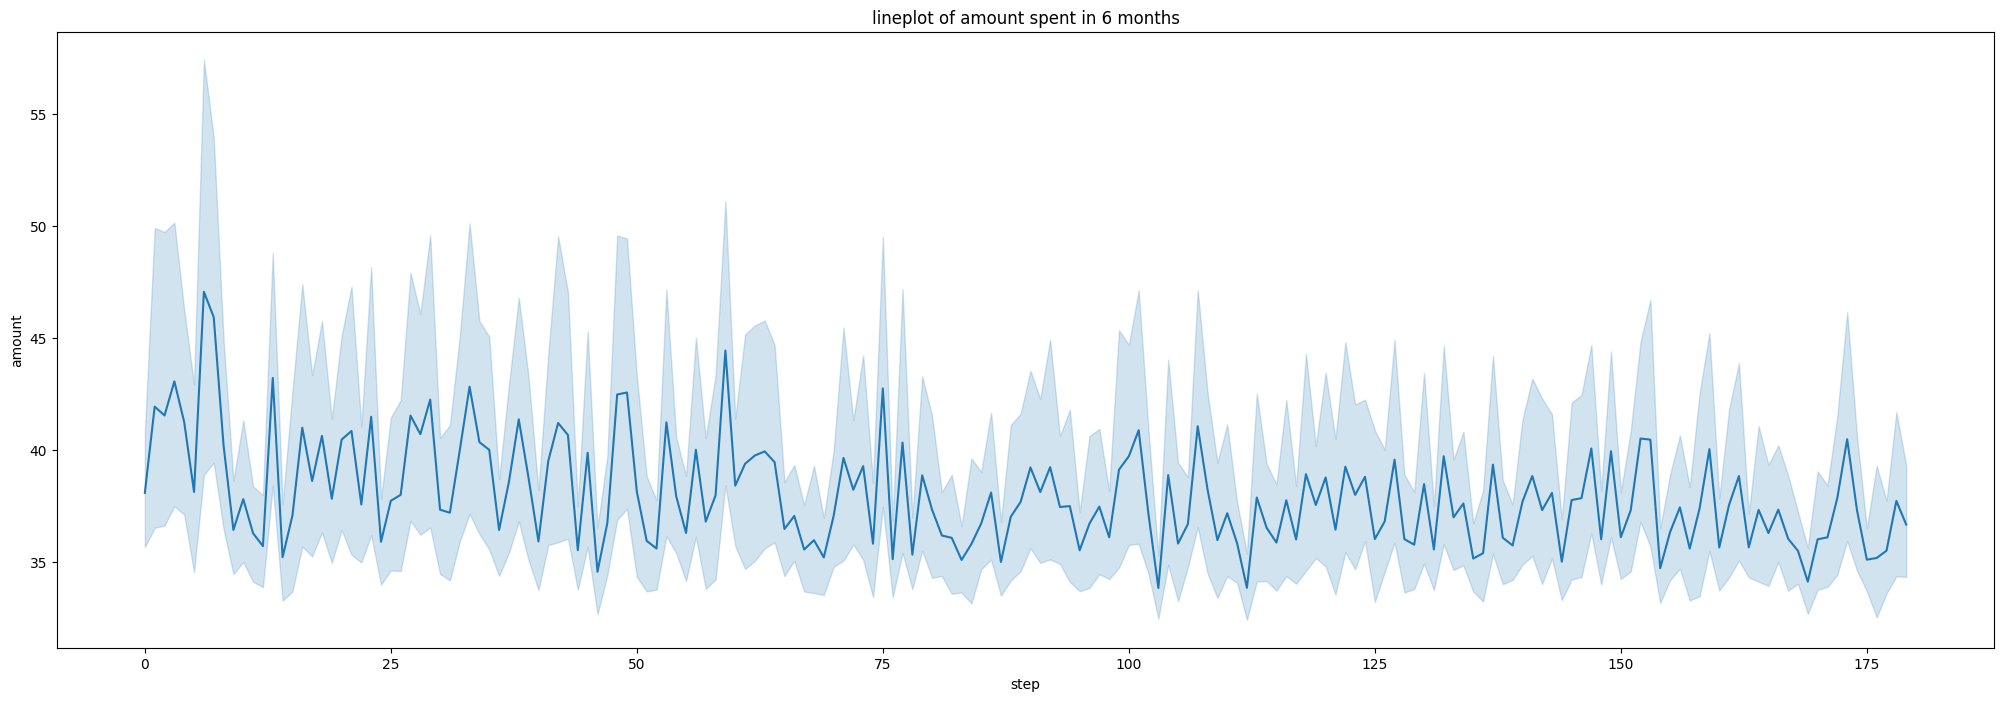

In [14]:
plt.figure(figsize=(25,8))
sns.lineplot(data=data, x='step', y='amount')
plt.title("lineplot of amount spent in 6 months")
plt.show()

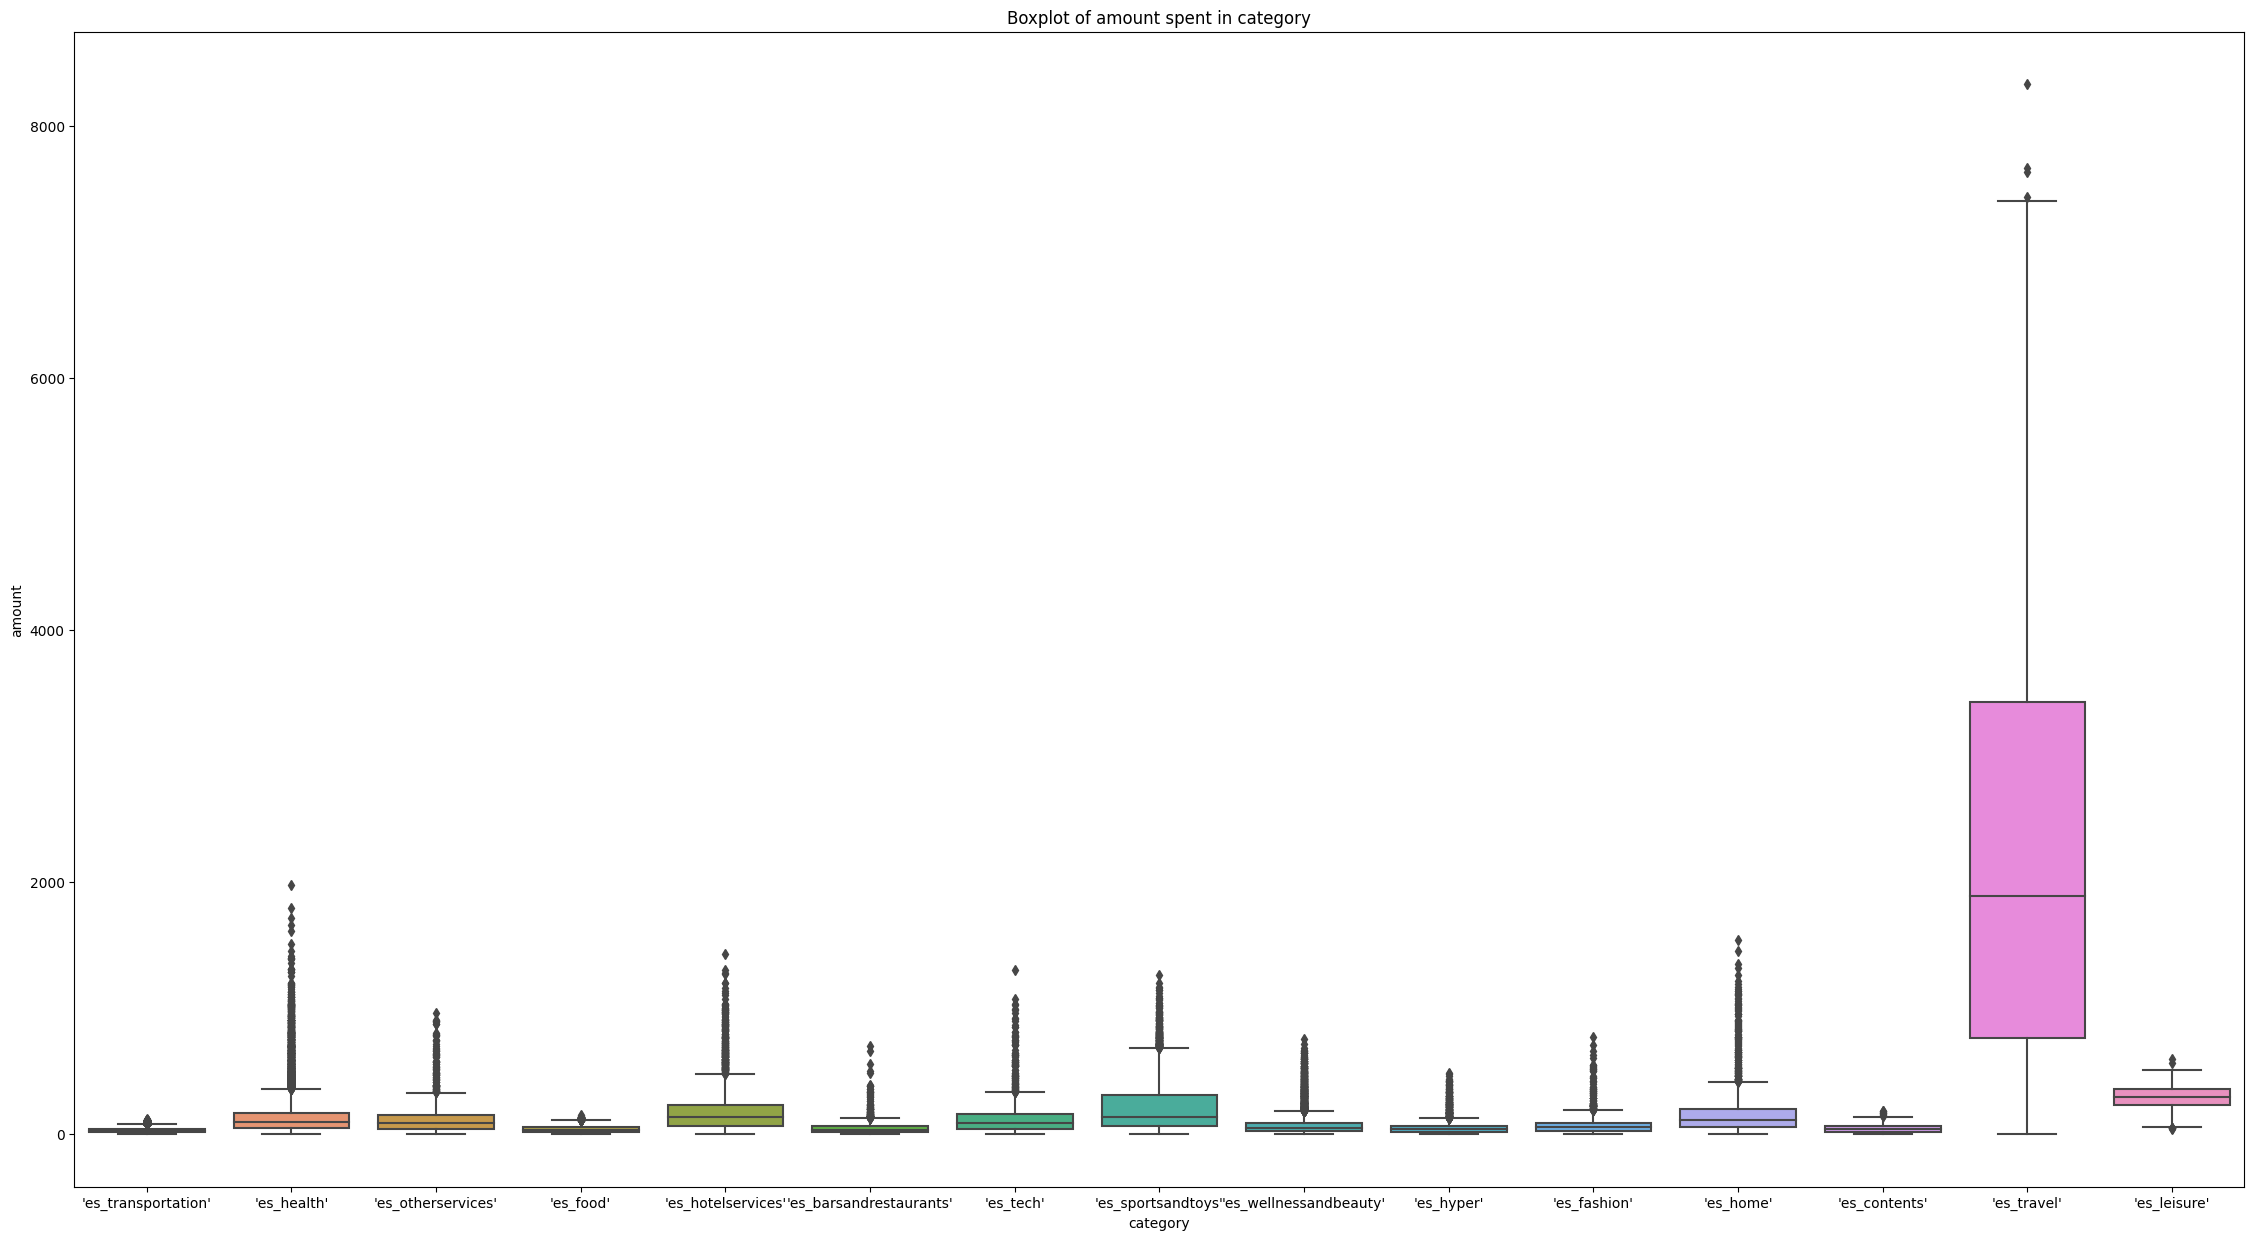

In [15]:
plt.figure(figsize=(28,15))
sns.boxplot(x=data['category'], y=data['amount'], orient="v")
plt.title("Boxplot of amount spent in category")
plt.show()

In [16]:
# Verify the contents of y before train-test split
y_value_counts_before_split = y.value_counts()

# Perform the stratified split again to ensure we have both classes in y_train
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Verify the contents of y_train after the split
y_value_counts_after_split = y_train.value_counts()

y_value_counts_before_split, y_value_counts_after_split

(0    504250
 Name: fraud, dtype: int64,
 0    352975
 Name: fraud, dtype: int64)

In [17]:
# Reload the dataset to start fresh
data = pd.read_csv(file_path)

# Convert string columns to category data type and encode them
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Splitting dataset into features (X) and target (y) without any outlier removal
X = data.drop('fraud', axis=1)
y = data['fraud']

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform the stratified split again
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Check the distribution of the target variable 'y' and 'y_train' after the split
y_value_counts_before_split_no_outliers = y.value_counts()
y_value_counts_after_split_no_outliers = y_train.value_counts()

y_value_counts_before_split_no_outliers, y_value_counts_after_split_no_outliers


(0    587443
 1      7200
 Name: fraud, dtype: int64,
 0    411210
 1      5040
 Name: fraud, dtype: int64)

In [18]:
from imblearn.over_sampling import SMOTE

# Perform the stratified split (assuming X_scaled and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check and visualize the class distribution after SMOTE
class_counts_smote = pd.Series(y_train_smote).value_counts()
print(class_counts_smote)

# Now you can continue with the rest of your training code using the resampled X_train_smote and y_train_smote


0    411210
1    411210
Name: fraud, dtype: int64


0    411210
1      5040
Name: fraud, dtype: int64


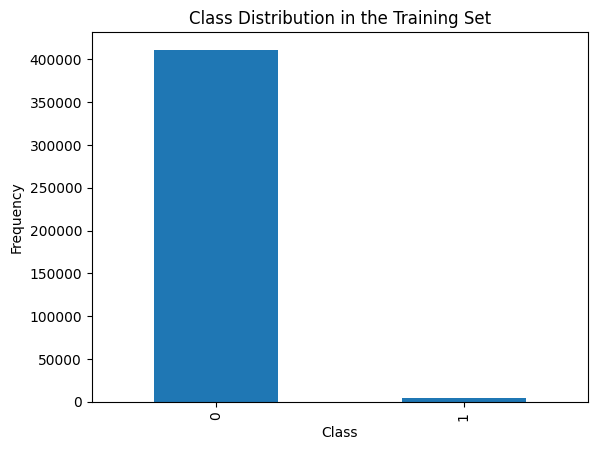

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming that 'X_scaled' and 'y' are defined and preprocessed correctly

# Perform the stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Check and visualize the class distribution after the split
class_counts = y_train.value_counts()
print(class_counts)
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Training Set')
plt.show()

# Calculate the class weights
weights = class_counts.max() / class_counts
class_weights = torch.tensor(weights.to_numpy(), dtype=torch.float)

# Ensure class_weights are in the order of your class labels
class_weights = class_weights[class_counts.index.sort_values()]

# Now you can continue with the rest of your training code


In [20]:
# Assuming class_counts is a pandas Series object that contains the counts of each class
negative_count = class_counts[0]
positive_count = class_counts[1]

# Calculate the class weight for the positive class
class_weight_for_positive = negative_count / positive_count

# This weight is then used in the BCEWithLogitsLoss as the pos_weight
class_weights = torch.tensor([class_weight_for_positive]).float()


In [21]:
# Part 2: Feedforward Neural Network Implementation

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define the Feedforward Neural Network Class
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No sigmoid here if using BCEWithLogitsLoss
        return x

# Prepare data for PyTorch DataLoader
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train.values).float()
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize and train the Feedforward Neural Network
input_size = X_train.shape[1]
hidden_size = 20  # example value
output_size = 1
ffnn = FeedforwardNN(input_size, hidden_size, output_size)

optimizer = torch.optim.Adam(ffnn.parameters(), lr=0.001)
class_weights = torch.tensor([class_weight_for_positive]).float()
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)  # Use class weights here
num_epochs = 5  # example value

for epoch in range(num_epochs):
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = ffnn(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))  # Make sure labels are the correct shape
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)  # Calculate the average loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')


Epoch [1/5], Average Loss: 0.3887
Epoch [2/5], Average Loss: 0.2947
Epoch [3/5], Average Loss: 0.2771
Epoch [4/5], Average Loss: 0.2571
Epoch [5/5], Average Loss: 0.2342


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import torch

# Assuming X_train is already converted to a tensor and is named X_train_tensor

# Convert y_train Series to a NumPy array and then to a tensor
y_train_np = y_train.values  # Convert Pandas Series to NumPy array
y_train_tensor = torch.tensor(y_train_np).unsqueeze(1).float()

# Print the shape of the converted y_train_tensor
print("Converted y_train_tensor shape:", y_train_tensor.shape)

# The rest of your RNN code can follow here...


Converted y_train_tensor shape: torch.Size([416250, 1])


In [24]:
import torch
import numpy as np

# Print the data types and shapes of X_train and y_train
print("X_train type:", type(X_train), "Shape:", X_train.shape)
print("y_train type:", type(y_train), "Shape:", y_train.shape)

# Test the conversion of X_train to a tensor
try:
    X_train_tensor = torch.tensor(X_train).float()
    print("Converted X_train_tensor shape:", X_train_tensor.shape)
except Exception as e:
    print("Error converting X_train:", e)

# Test the conversion of y_train to a tensor
try:
    y_train_tensor = torch.tensor(y_train).unsqueeze(1).float() if len(y_train.shape) == 1 else torch.tensor(y_train).float()
    print("Converted y_train_tensor shape:", y_train_tensor.shape)
except Exception as e:
    print("Error converting y_train:", e)


X_train type: <class 'numpy.ndarray'> Shape: (416250, 9)
y_train type: <class 'pandas.core.series.Series'> Shape: (416250,)
Converted X_train_tensor shape: torch.Size([416250, 9])
Error converting y_train: 1


In [25]:
# Part 3: Recurrent Neural Network (RNN) Implementation

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Define the RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, 1, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return torch.sigmoid(out)

# Ensure y_train is converted correctly
y_train_tensor_rnn = torch.tensor(y_train.values).unsqueeze(1).float()

# Process X_train data
input_size = X_train.shape[1]
X_train_sequences = X_train.reshape(-1, 1, input_size)
X_train_tensor_rnn = torch.tensor(X_train_sequences).float()

# Create DataLoader
train_dataset_rnn = TensorDataset(X_train_tensor_rnn, y_train_tensor_rnn)
train_loader_rnn = DataLoader(train_dataset_rnn, batch_size=32, shuffle=True)

# Initialize RNN
rnn = RNNModel(input_size=input_size, hidden_size=20, output_size=1)
optimizer_rnn = torch.optim.Adam(rnn.parameters(), lr=0.0001)
criterion_rnn = nn.BCELoss()

# Training loop with dimension adjustment
num_epochs = 5
for epoch in range(num_epochs):
    for sequences, labels in train_loader_rnn:
        optimizer_rnn.zero_grad()
        outputs = rnn(sequences)

        # Ensure outputs and labels are both 1D tensors
        outputs = outputs.squeeze()  # outputs shape becomes [batch_size]
        labels = labels.squeeze()  # labels shape becomes [batch_size]

        # Calculate loss
        loss = criterion_rnn(outputs, labels)
        loss.backward()
        optimizer_rnn.step()
    print(f'RNN Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


RNN Epoch [1/5], Loss: 0.0084
RNN Epoch [2/5], Loss: 0.0046
RNN Epoch [3/5], Loss: 0.0042
RNN Epoch [4/5], Loss: 0.0035
RNN Epoch [5/5], Loss: 0.0025


In [26]:
#LSTM Implementation
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        h_n = h_n[-1]
        out = self.dropout(h_n)
        out = self.fc(out)
        return torch.sigmoid(out)

# Ensure y_train is converted correctly
if isinstance(y_train, pd.Series):
    y_train_tensor_rnn = torch.tensor(y_train.values).unsqueeze(1).float()
else:
    y_train_tensor_rnn = torch.tensor(y_train).unsqueeze(1).float()

# Process X_train data
input_size = X_train.shape[1]
X_train_sequences = X_train.reshape(-1, 1, input_size)
X_train_tensor_rnn = torch.tensor(X_train_sequences).float()

# Create DataLoader
train_dataset_rnn = TensorDataset(X_train_tensor_rnn, y_train_tensor_rnn)
train_loader_rnn = DataLoader(train_dataset_rnn, batch_size=32, shuffle=True)

# Initialize LSTM Model
lstm = LSTMModel(input_size=input_size, hidden_size=20, output_size=1)
optimizer_rnn = torch.optim.Adam(lstm.parameters(), lr=0.001)
criterion_rnn = nn.BCELoss()

# Training loop with LSTM
num_epochs = 5
for epoch in range(num_epochs):
    for sequences, labels in train_loader_rnn:
        optimizer_rnn.zero_grad()
        outputs = lstm(sequences)
        outputs = outputs.squeeze()
        loss = criterion_rnn(outputs, labels.squeeze())
        loss.backward()
        optimizer_rnn.step()
    print(f'LSTM Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


LSTM Epoch [1/5], Loss: 0.0063
LSTM Epoch [2/5], Loss: 0.0022
LSTM Epoch [3/5], Loss: 0.0020
LSTM Epoch [4/5], Loss: 0.0020
LSTM Epoch [5/5], Loss: 0.0258


In [27]:
# Part 4: Model Evaluation and Performance Metrics

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

# Assuming 'X_test' and 'y_test' are prepared for evaluation
# Evaluate Feedforward Neural Network
ffnn.eval()
X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test.values).float()
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

ffnn_predictions = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = ffnn(inputs)
        ffnn_predictions.extend(outputs.data.squeeze().numpy())

# Convert predictions to binary
ffnn_predictions_bin = [1 if x > 0.5 else 0 for x in ffnn_predictions]

# Calculate performance metrics for Feedforward Neural Network
confusion_matrix_ffnn = confusion_matrix(y_test, ffnn_predictions_bin)
accuracy_ffnn = accuracy_score(y_test, ffnn_predictions_bin)
roc_auc_ffnn = roc_auc_score(y_test, ffnn_predictions_bin)
report_ffnn = classification_report(y_test, ffnn_predictions_bin)

print("Feedforward Neural Network Performance Metrics:")
print(f"Confusion Matrix:\n{confusion_matrix_ffnn}")
print(f"Accuracy: {accuracy_ffnn}")
print(f"ROC AUC: {roc_auc_ffnn}")
print(f"Classification Report:\n{report_ffnn}")


Feedforward Neural Network Performance Metrics:
Confusion Matrix:
[[171466   4767]
 [   209   1951]]
Accuracy: 0.9721065288436206
ROC AUC: 0.9380956616041347
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    176233
           1       0.29      0.90      0.44      2160

    accuracy                           0.97    178393
   macro avg       0.64      0.94      0.71    178393
weighted avg       0.99      0.97      0.98    178393



In [28]:
# Part 5: Random Forest Model for Comparison

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on the same dataset
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Calculate performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test, rf_predictions)
roc_auc_rf = roc_auc_score(y_test, rf_predictions)
report_rf = classification_report(y_test, rf_predictions)

print("Random Forest Performance Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"ROC AUC: {roc_auc_rf}")
print(f"Classification Report:\n{report_rf}")


Random Forest Performance Metrics:
Accuracy: 0.9956668703368405
ROC AUC: 0.8693087681060279
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176233
           1       0.88      0.74      0.81      2160

    accuracy                           1.00    178393
   macro avg       0.94      0.87      0.90    178393
weighted avg       1.00      1.00      1.00    178393



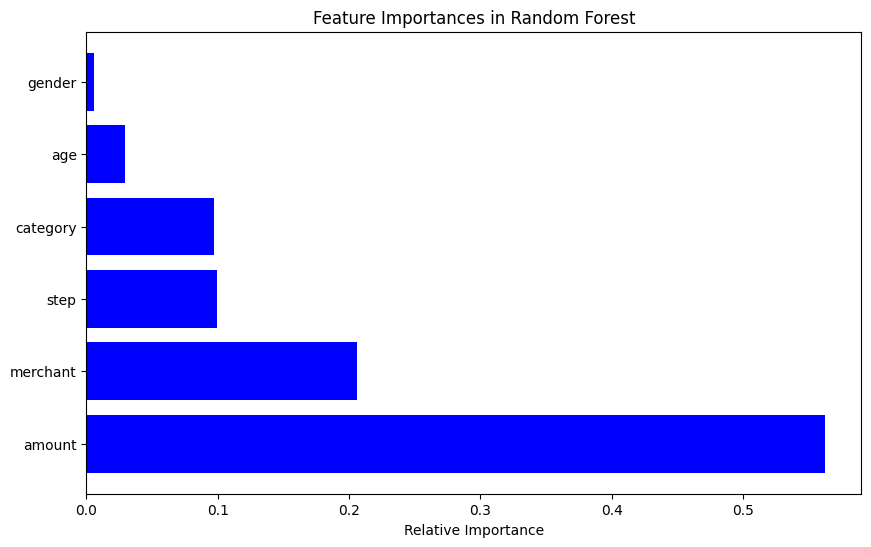

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
df = data.copy()
df = df.drop(columns=['customer', 'zipcodeOri', 'zipMerchant'])  # Drop non-relevant columns
df['age'] = LabelEncoder().fit_transform(df['age'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['category'] = LabelEncoder().fit_transform(df['category'])

# Splitting dataset into features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

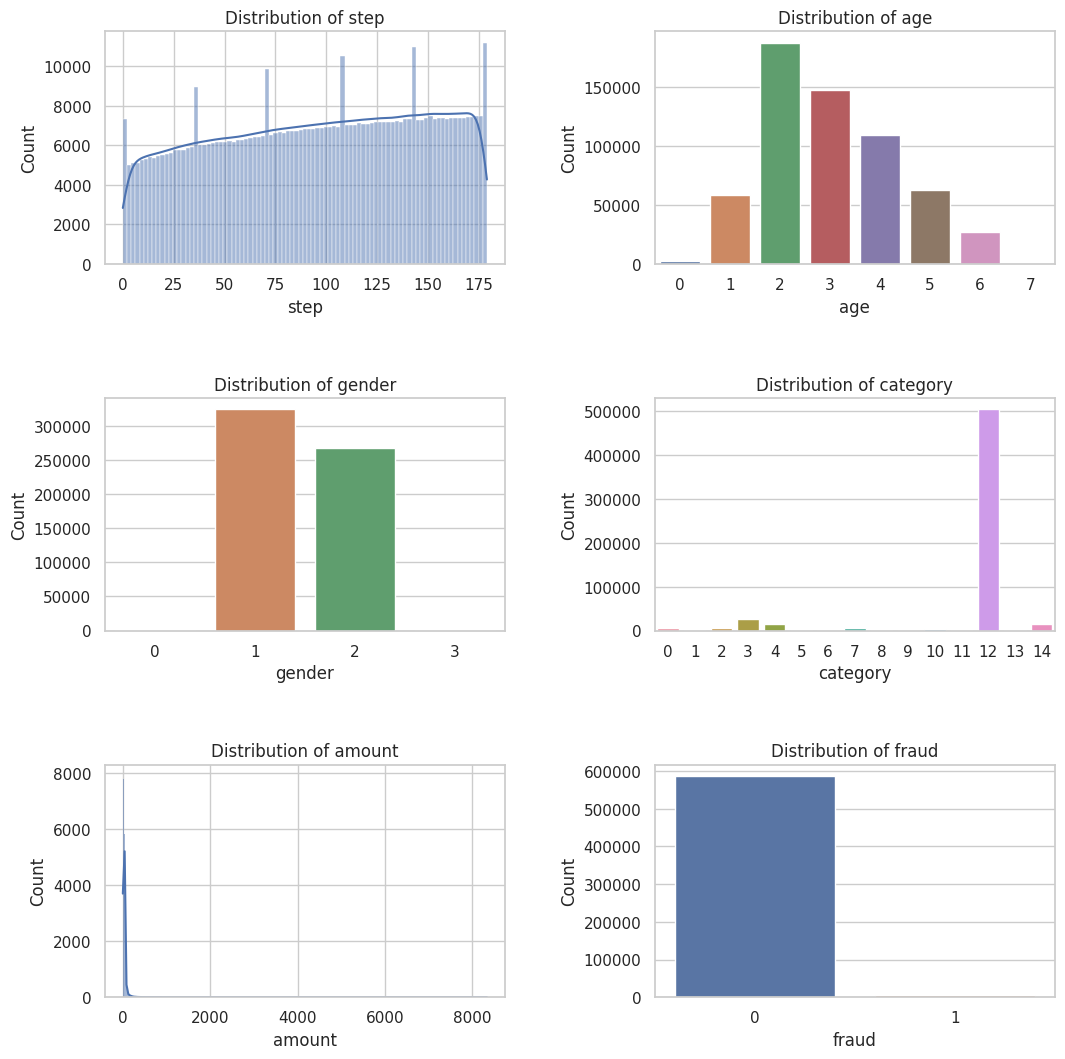

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of features for visualization
features = ['step', 'age', 'gender', 'category', 'amount', 'fraud']

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.tight_layout(pad=6.0)

# Loop through the features and create a plot for each
for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    if feature in ['step', 'amount']:
        # Histogram for numerical features
        sns.histplot(data[feature], kde=True, ax=ax)
    else:
        # Count plot for categorical features
        sns.countplot(x=feature, data=data, ax=ax)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.show()


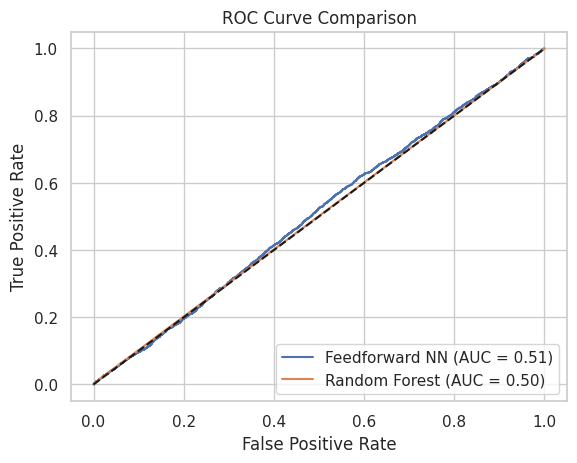

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and ROC area for Feedforward Neural Network
fpr_ffnn, tpr_ffnn, _ = roc_curve(y_test, ffnn_predictions)
roc_auc_ffnn = auc(fpr_ffnn, tpr_ffnn)

# Calculate ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_predictions)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_ffnn, tpr_ffnn, label=f'Feedforward NN (AUC = {roc_auc_ffnn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


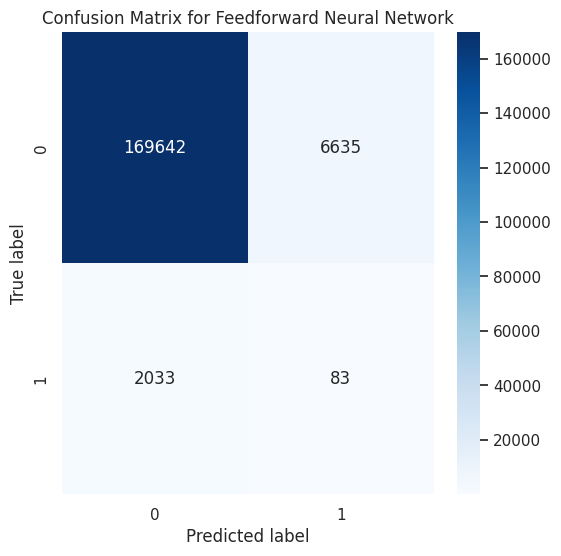

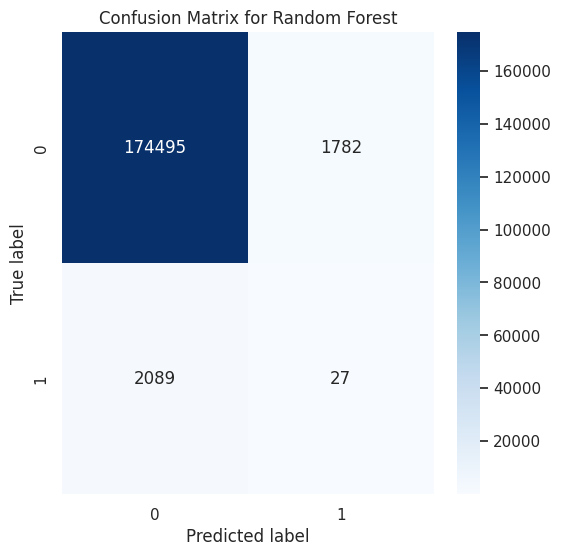

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have binary predictions from your models (convert probabilities if needed)
ffnn_predictions_bin = [1 if x > 0.5 else 0 for x in ffnn_predictions]
rf_predictions_bin = [1 if x > 0.5 else 0 for x in rf_predictions]

# Confusion matrix for Feedforward Neural Network
conf_matrix_ffnn = confusion_matrix(y_test, ffnn_predictions_bin)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions_bin)

# Plotting the confusion matrix for Feedforward Neural Network
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_ffnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Feedforward Neural Network')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

confusion_ffnn = confusion_matrix(y_test, ffnn_predictions_bin)
accuracy_ffnn = accuracy_score(y_test, ffnn_predictions_bin)
roc_auc_ffnn = roc_auc_score(y_test, ffnn_predictions_bin)
report_ffnn = classification_report(y_test, ffnn_predictions_bin, output_dict=True)

# Extracting sensitivity (recall of the positive class) and specificity (recall of the negative class) for FNN
sensitivity_ffnn = report_ffnn['1']['recall']
specificity_ffnn= report_ffnn['0']['recall']
specificity_ffnn# Displaying the metrics in a structured table
print("Feedforward Neural Network Performance Metrics:")
print(f"Confusion Matrix:\n{confusion_ffnn}")
print(f"Accuracy: {accuracy_ffnn:.4f}, Sensitivity: {sensitivity_ffnn:.4f}, Specificity: {specificity_ffnn:.4f}, AUC: {roc_auc_ffnn:.4f}")


Feedforward Neural Network Performance Metrics:
Confusion Matrix:
[[169642   6635]
 [  2033     83]]
Accuracy: 0.9514, Sensitivity: 0.0392, Specificity: 0.9624, AUC: 0.5008
